In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
from pathlib import Path

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))

from src.visualization._eda import TimeSeriesEDA

In [4]:
# Load the dataset
file_path = "../../data/bronze/LD2011_2014.txt"
df = pd.read_csv(file_path, sep=";", index_col=0, parse_dates=True, decimal=",")

In [5]:
# Check the first few rows
display(df.head())

# Get dataset info
print(df.info())

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB
None


In [6]:
# Print only columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())

Columns with missing values: []


In [7]:
# Summary statistics
print(df.describe())

              MT_001         MT_002         MT_003         MT_004  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean        3.970785      20.768480       2.918308      82.184490   
std         5.983965      13.272415      11.014456      58.248392   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.844950       0.000000      36.585366   
50%         1.269036      24.893314       1.737619      87.398374   
75%         2.538071      29.871977       1.737619     115.853659   
max        48.223350     115.220484     151.172893     321.138211   

              MT_005         MT_006         MT_007         MT_008  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean       37.240309     141.227385       4.521338     191.401476   
std        26.461327      98.439984       6.485684     121.981187   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.853659      71.4285

In [8]:
# Convert column names to numeric (Client IDs)
df.columns = [f"Client_{i+1}" for i in range(df.shape[1])]

# Resample to hourly data
df_hourly = df.resample("h").sum()

# Resample to daily data
df_daily = df.resample("D").sum()

### Plot Clients Load over Time


🕒 PREPARING DATETIME INDEX
✓ Index is already a DatetimeIndex

🔍 DETECTING TIME SERIES FREQUENCY
   → Pandas inferred frequency: D
╔═════════════════════════════════════════════════╗
║              TIME SERIES ANALYSIS               ║
╚═════════════════════════════════════════════════╝

📊 SUMMARY STATISTICS
───────────────────────────────
  mean: 380.9346073454763
  variance: 239625.1940087596
  min: 0.0
  max: 1670.0507614213197
  missing_values: 0
  periodicity: daily

📈 STATIONARITY TEST
───────────────────────────────
  ADF Statistic: -3.9795830353826336
  p-value: 0.00152127579274667
  Lags Used: 16
  Critical Values: {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}
  Stationary: True

⚠️ OUTLIERS DETECTED
───────────────────────────────
  Z-score method: 0 outliers
  Seasonal method: 44 outliers

📉 VISUALIZATIONS
───────────────────────────────
Plot saved to ../../reports//time_series.png


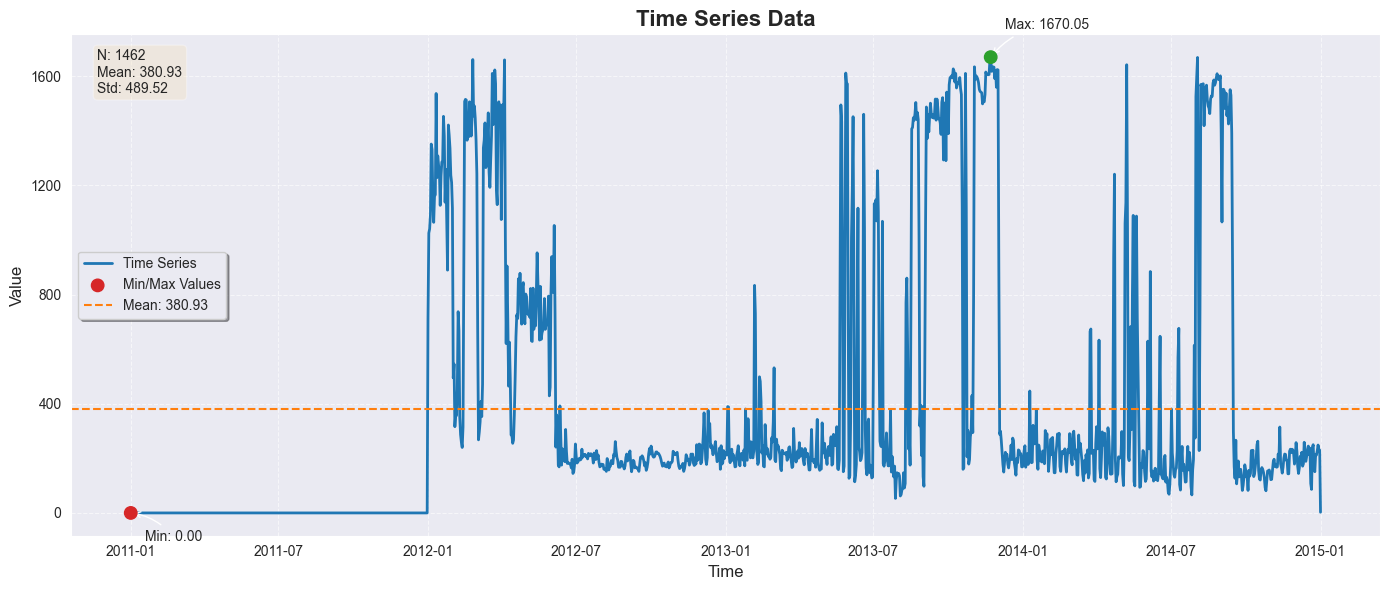

Plot saved to ../../reports//rolling_stats.png


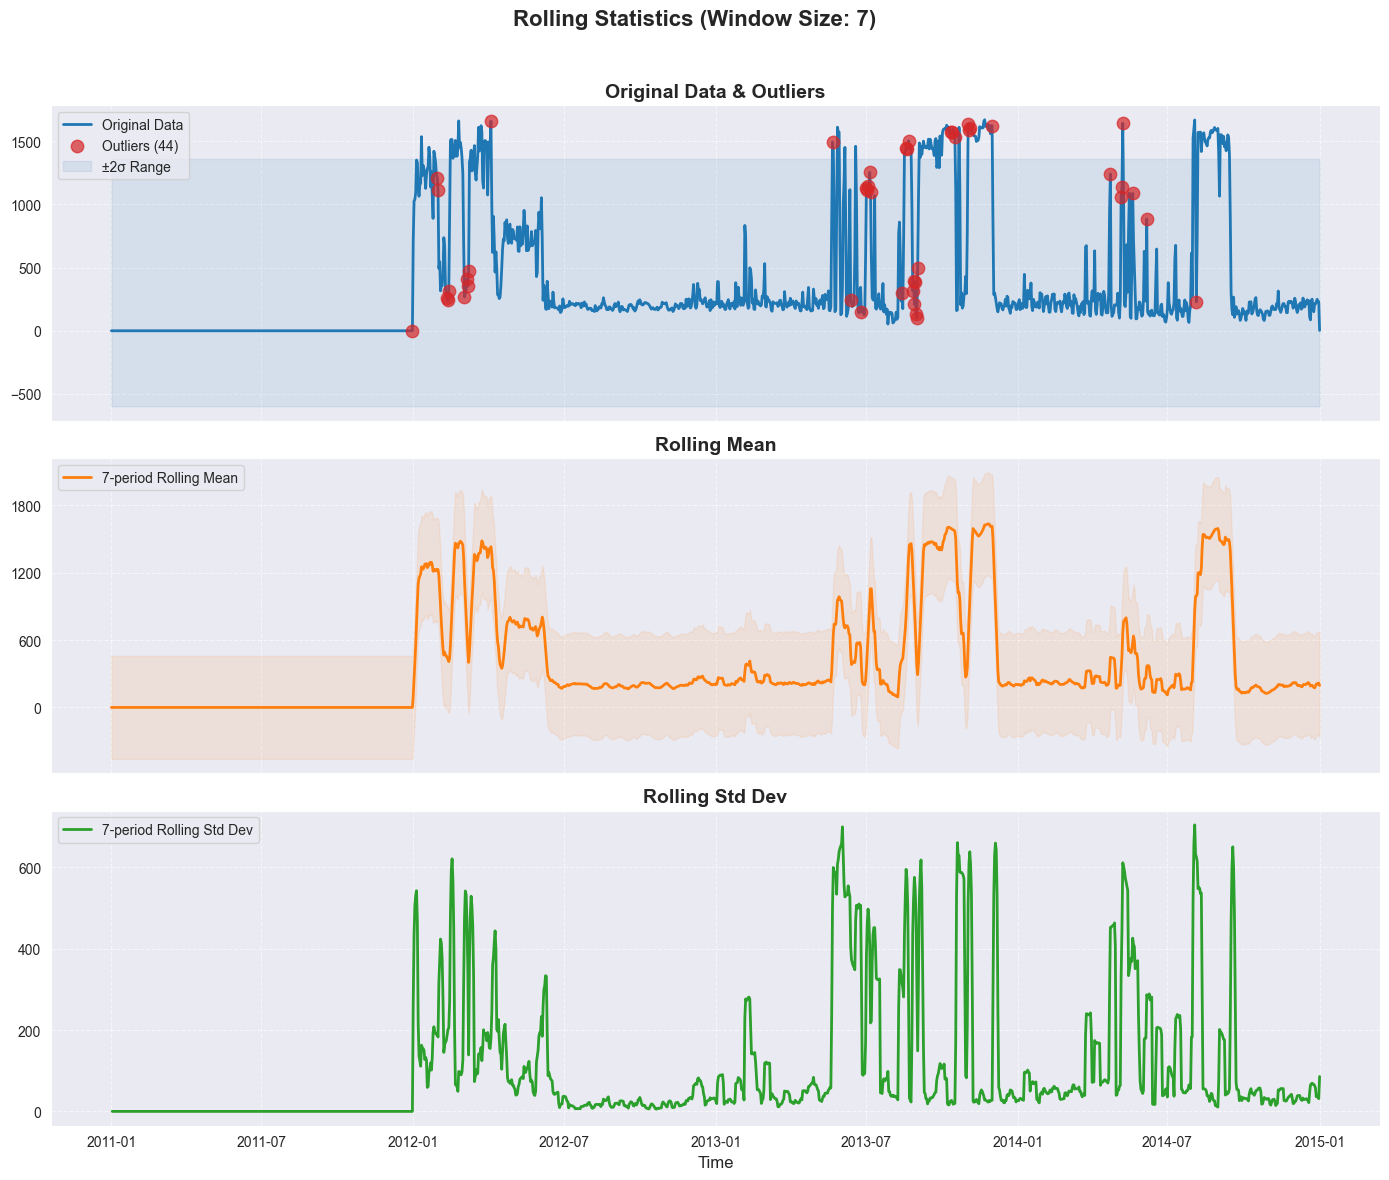

Plot saved to ../../reports//decomposition.png


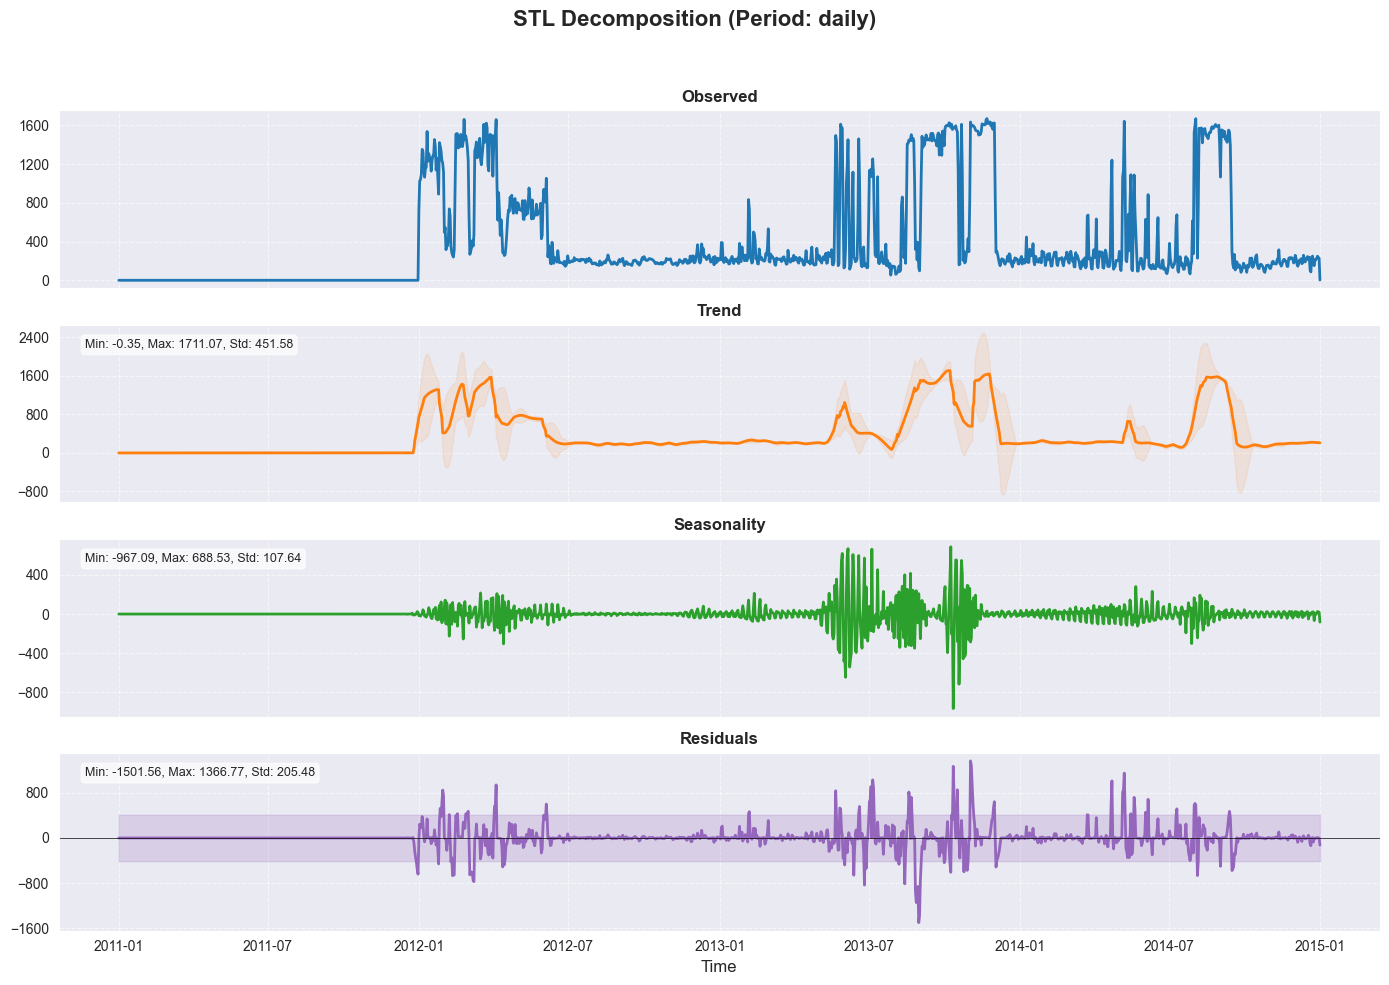

Plot saved to ../../reports//dashboard.png


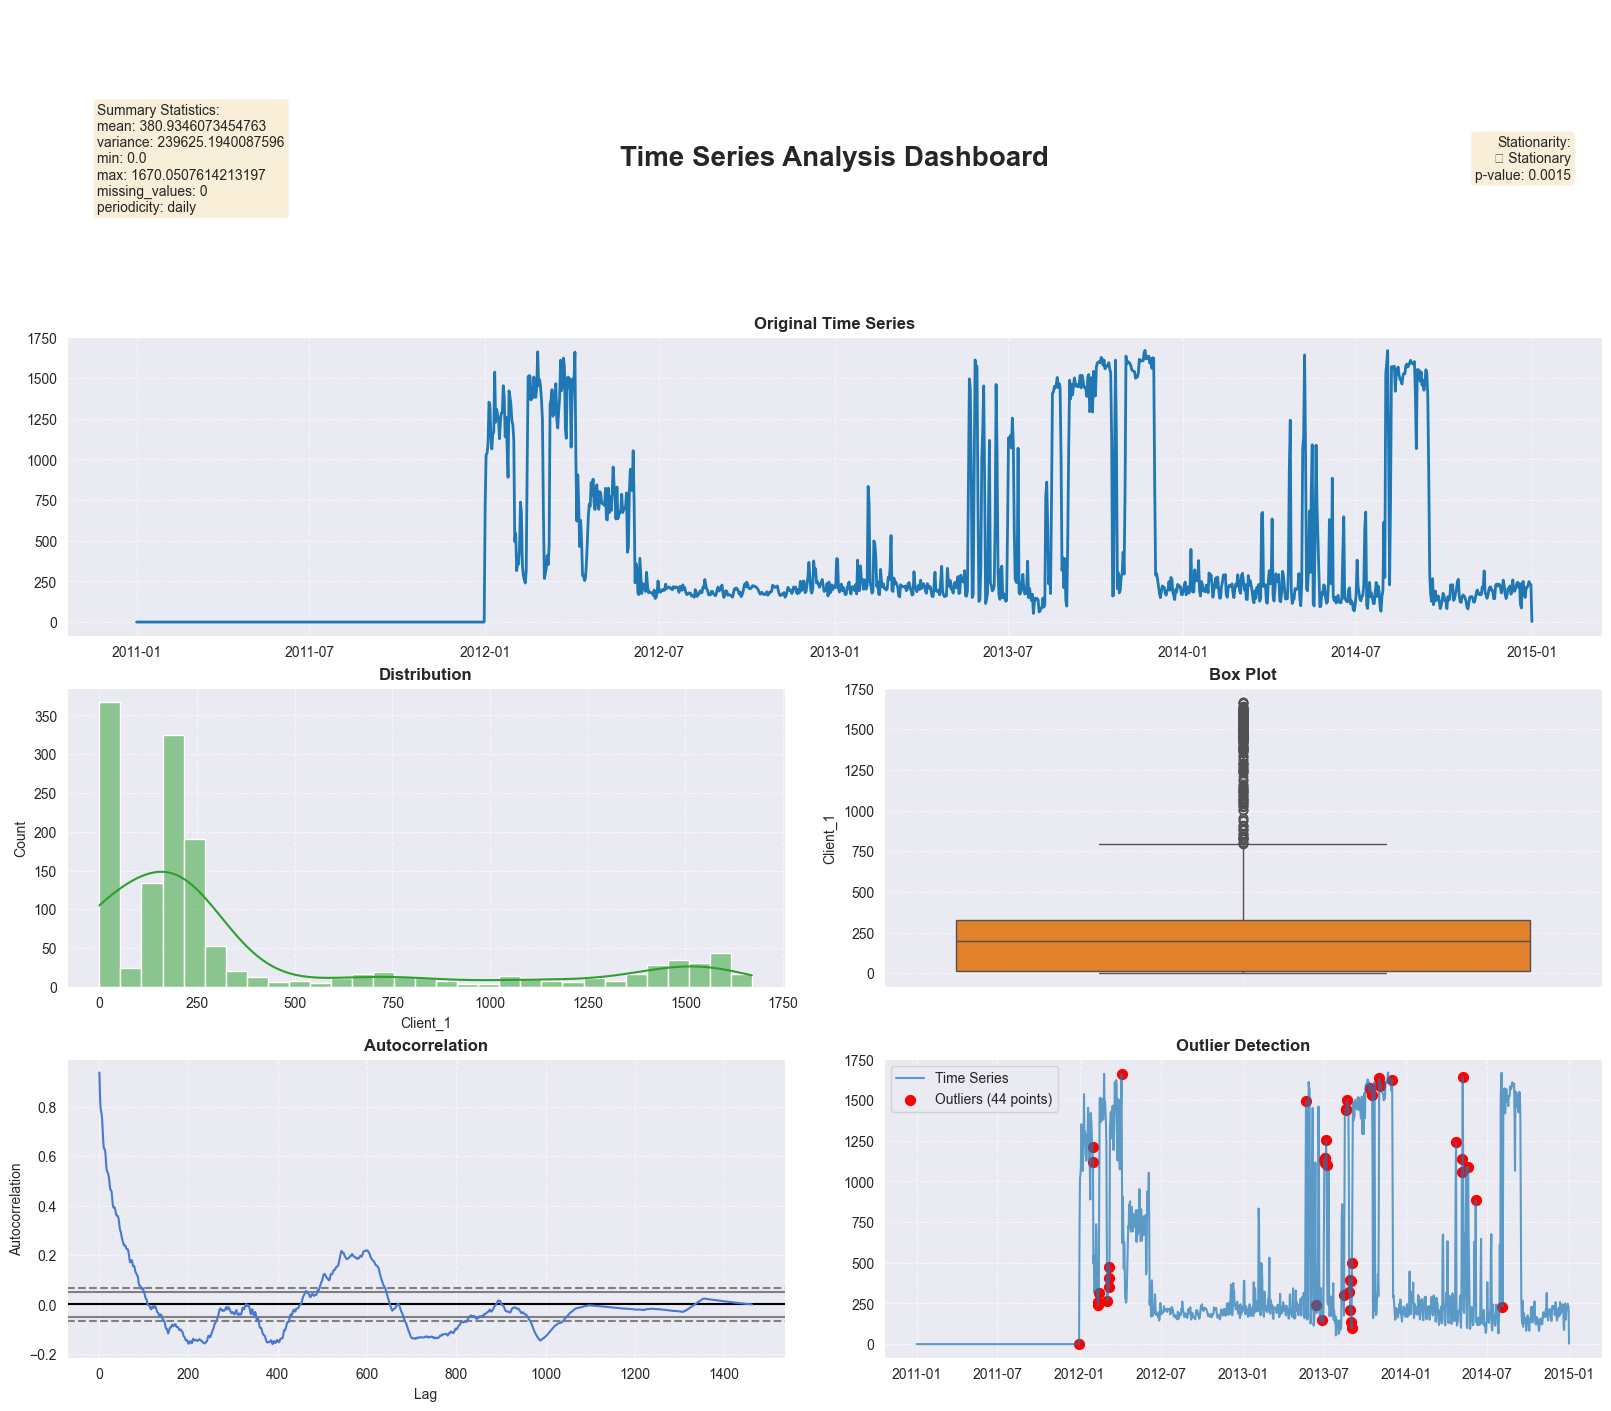

Plot saved to ../../reports//seasonal.png


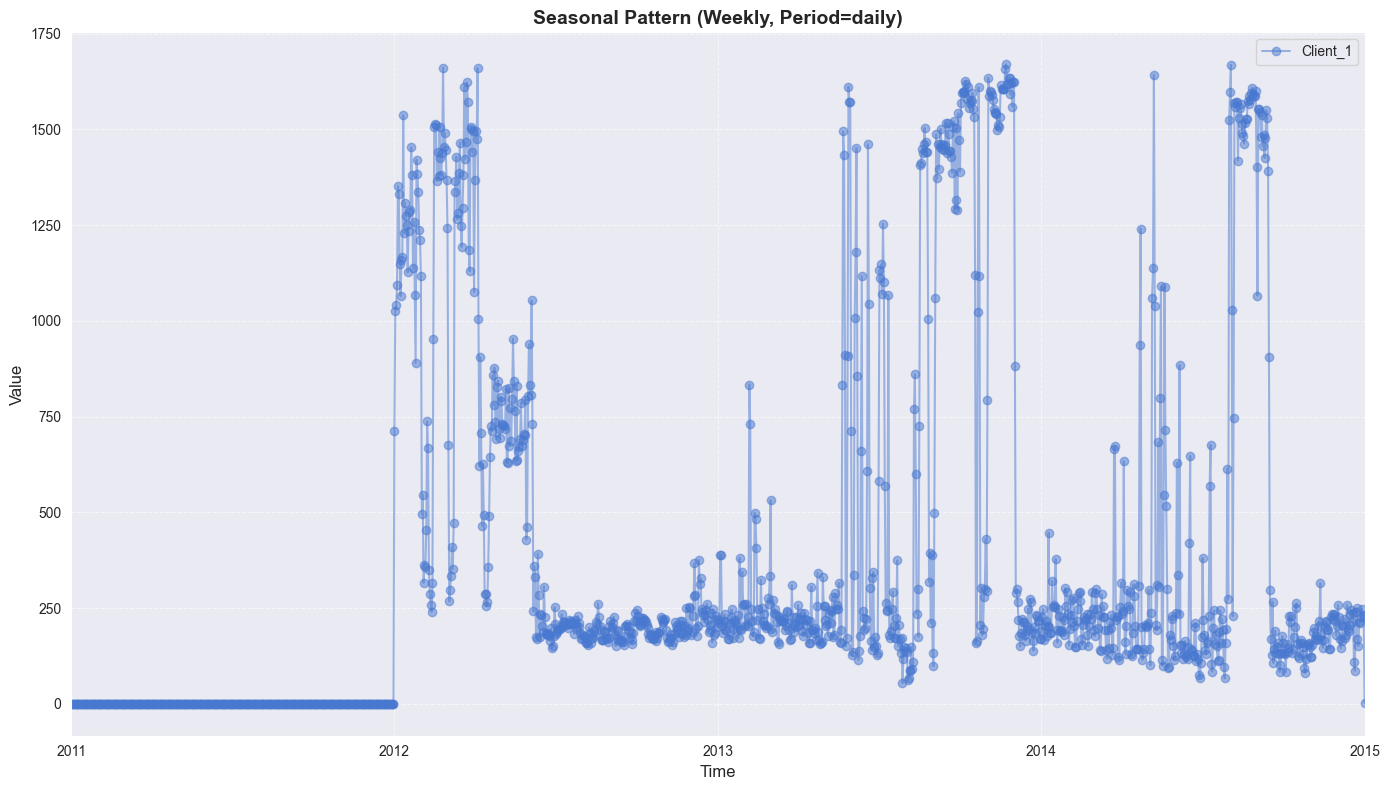

Plot saved to ../../reports//outlier_impact.png


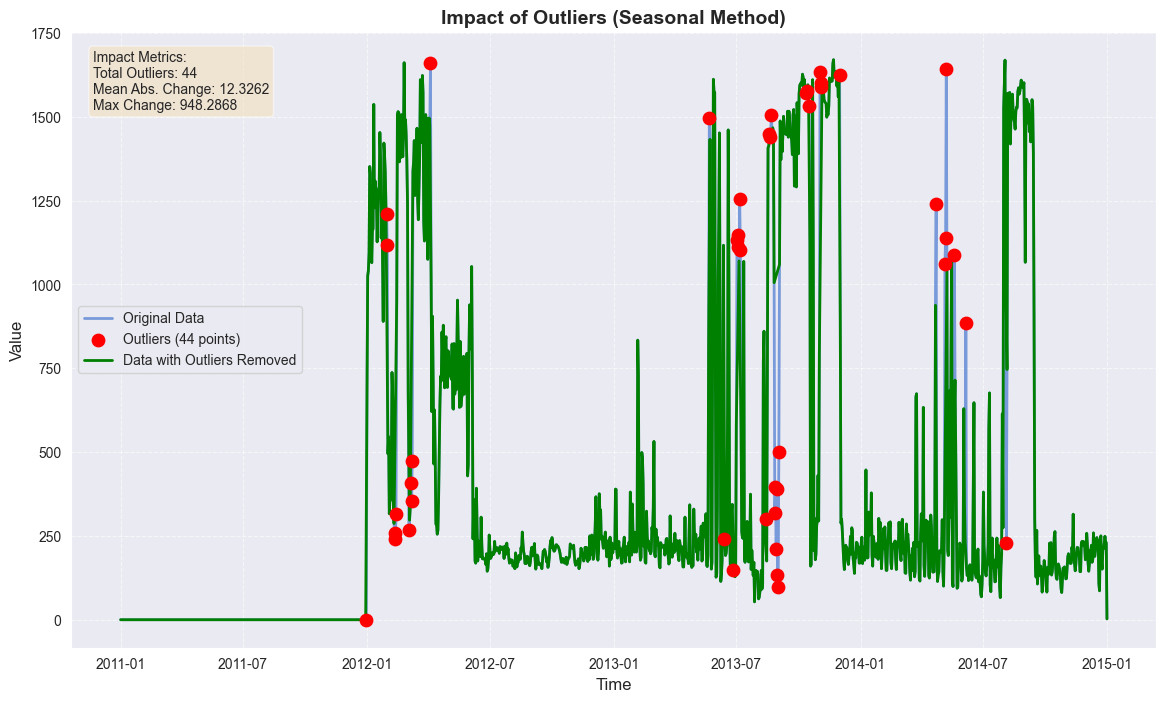

{'statistics': {'mean': 380.9346073454763,
  'variance': 239625.1940087596,
  'min': 0.0,
  'max': 1670.0507614213197,
  'missing_values': 0,
  'periodicity': 'daily'},
 'stationarity': {'ADF Statistic': -3.9795830353826336,
  'p-value': 0.00152127579274667,
  'Lags Used': 16,
  'Critical Values': {'1%': -3.4348835326305642,
   '5%': -2.863542248636555,
   '10%': -2.5678359819686065},
  'Stationary': True},
 'outliers': {'zscore': Series([], Freq: D, Name: Client_1, dtype: float64),
  'seasonal': 2011-12-31       0.000000
  2012-01-30    1210.659898
  2012-01-31    1116.751269
  2012-02-11     258.883249
  2012-02-12     239.847716
  2012-02-13     314.720812
  2012-03-03     267.766497
  2012-03-06     408.629442
  2012-03-07     352.791878
  2012-03-08     472.081218
  2012-04-04    1659.898477
  2013-05-22    1494.923858
  2013-06-13     241.116751
  2013-06-26     148.477157
  2013-07-02    1133.248731
  2013-07-03    1111.675127
  2013-07-04    1147.208122
  2013-07-06    1253.807

In [9]:
# Select a sample client for analysis
client_ts = df_daily["Client_1"].dropna()

# Instantiate the EDA class
ts_eda = TimeSeriesEDA(client_ts)

# Run full analysis
ts_eda.run_full_analysis(save_plots=True, output_dir="../../reports/")